<a href="https://colab.research.google.com/github/gufsousa/Projeto_bootcamp_CDIA/blob/main/Projeto_Bootcamp_CDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Bootcamp CDIA**

## **Objetivo:**
* Desenvolver um sistema automatizado utilizando
Inteligência Artificial (IA) para classificar os defeitos.

## **Metodologia Double Diamond:**

A **metodologia Double Diamond** é um framework dividido em quatro fases que guia a resolução de problemas complexos. Na primeira fase (Discover), explora-se o contexto do problema de forma ampla, coletando dados e insights sobre os desafios da inspeção manual de chapas de aço. Em seguida, na fase Define, os dados são analisados para identificar padrões e priorizar os problemas principais, como o desbalanceamento das classes de defeitos e a baixa acurácia em classes específicas.

Na terceira fase (Develop), são geradas e testadas soluções iterativas, como a aplicação de SMOTE para balanceamento e o ajuste de modelos de machine learning. Finalmente, na fase Deliver, a solução é refinada e implementada, com foco em métricas de desempenho e na integração com sistemas industriais. Essa abordagem garante uma solução alinhada às necessidades reais, equilibrando criatividade e rigor



### **Cronograma**

* 09/05/2025	 Análise Exploratória (Fase 1-2)

* 12/05/2025	Modelagem e Avaliação (Fase 3)

* 14/05/2025	Refinamento e Visualizações (Fase 4)

* 15/05	Apresentação para a banca

## **Análise Exploratória**





Esta análise exploratória visa identificar e tratar valores nulos, negativos e correlações em um conjunto de dados de controle de qualidade para chapas de aço. O objetivo é garantir a integridade dos dados para modelagem preditiva, mantendo relações estatísticas relevantes e corrigindo inconsistências.

### **Primeira analise de dados:**

* Colunas com valores nulos;
* Colunas com valores negativos;
* Colunas com valores unicos negativos;
* Analise de corelação;
* Dados Duplicados;
* Variaveis desbalanceadas.




In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('bootcamp_train_classe.csv').dropna(axis=1, how='all')  # Remove colunas 100% nulas

# Criar arquivo de relatório
with open("relatorio_analise.txt", "w", encoding='utf-8') as report:

    def log(msg=""):
        print(msg)
        report.write(str(msg) + "\n")

    ## 1. Análise de Valores Nulos
    log("\n1. Colunas com valores nulos:")
    null_columns = df.columns[df.isnull().any()].tolist()
    log(null_columns)

    ## 2. Análise de Valores Negativos
    log("\n2. Colunas com valores negativos:")
    negative_columns = [col for col in df.select_dtypes(include=[np.number]).columns if (df[col] < 0).any()]
    log(negative_columns)

    log("\n3. Colunas com apenas um único valor negativo:")
    single_negative_columns = [col for col in negative_columns if len(df[col][df[col] < 0].unique()) == 1]
    log(single_negative_columns)

    ## 4. Análise de Correlação
    log("\n4. Análise de Correlação:")
    corr_matrix = df.select_dtypes(include=[np.number]).corr()
    strong_corrs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.9:
                strong_corrs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

    strong_corrs.sort(key=lambda x: abs(x[2]), reverse=True)

    if strong_corrs:
        log("\nCorrelações fortes encontradas (|r| > 0.9):")
        for var1, var2, corr in strong_corrs:
            log(f"- {var1} e {var2}: {corr:.2f}")
            if corr > 0:
                log("  Tipo: Positiva (ambas aumentam ou diminuem juntas)")
            else:
                log("  Tipo: Negativa (uma aumenta quando a outra diminui)")
            if abs(corr) > 0.9:
                log("  Sugestão: Verificar redundância - possivelmente uma pode ser removida")
            else:
                log("  Sugestão: Manter ambas, mas considerar em análises multivariadas")
    else:
        log("Nenhuma correlação forte (|r| > 0.7) encontrada entre as variáveis numéricas")

    ## 5. Verificar balanceamento das classes
    log("\n5. Variáveis desbalanceadas:")
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
    threshold = 0.4
    for col in categorical_cols:
        proportions = df[col].value_counts(normalize=True)
        if proportions.iloc[0] > threshold:
            log(f"- {col}: valores encontrados -> {list(proportions.index)}")

    ## 6. Verificar dados duplicados
    log("\n6. Dados duplicados:")
    duplicates = df.duplicated()
    log(f"Número de linhas duplicadas: {duplicates.sum()}")
    if duplicates.sum() > 0:
        log(df[duplicates])


    ## 7. Relatório Resumido
    log("\n=== RELATÓRIO RESUMIDO ===")
    log(f"Total de linhas: {len(df)}")
    log(f"Total de colunas: {len(df.columns)}")
    log(f"\nColunas com valores nulos ({len(null_columns)}):")
    log(", ".join(null_columns))
    log(f"\nColunas com valores negativos ({len(negative_columns)}):")
    log(", ".join(negative_columns))
    log(f"Linhas duplicadas: {duplicates.sum()}")
    log(f"\nColunas com apenas um valor negativo ({len(single_negative_columns)}):")
    log(", ".join(single_negative_columns))

    if strong_corrs:
        log("\nPrincipais correlações encontradas:")
        for var1, var2, corr in strong_corrs[:30]:
            log(f"- {var1} e {var2}: {corr:.2f}")


# Confirmação de criação
print("\n Relatório gerado com sucesso: relatorio_analise.txt")



1. Colunas com valores nulos:
['x_maximo', 'soma_da_luminosidade', 'maximo_da_luminosidade', 'espessura_da_chapa_de_aço', 'index_quadrado', 'indice_global_externo', 'indice_de_luminosidade']

2. Colunas com valores negativos:
['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels', 'perimetro_x', 'perimetro_y', 'comprimento_do_transportador', 'espessura_da_chapa_de_aço', 'indice_de_variacao_x', 'indice_de_variacao_y', 'indice_de_orientaçao', 'indice_de_luminosidade']

3. Colunas com apenas um único valor negativo:
['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels', 'perimetro_x', 'perimetro_y', 'comprimento_do_transportador', 'espessura_da_chapa_de_aço']

4. Análise de Correlação:

Correlações fortes encontradas (|r| > 0.9):
- tipo_do_aço_a400 e tipo_do_aço_a300: -1.00
  Tipo: Negativa (uma aumenta quando a outra diminui)
  Sugestão: Verificar redundância - possivelmente uma pode ser removida
- tipo_do_aço e tipo_do_aço_a400: -1.00
  Tipo: Negativa (uma aumenta quan

### **Primeiro tratamentos de dados:**

* Transfomar variaveis categoricas em binarias;

* Tratar valor nulo na variavel tipo_de_aço_A400;

* Criação da flag binária tipo_do_aço;

* Criação da Flag binaria anamalia_sensor para dados com possivel erro do sensor;

* Excluir colunas tipo_de_aço_A300, tipo_de_aço_A400 e peso.

In [2]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('bootcamp_train.csv')

# Padronizar nomes de colunas (opcional, caso haja variações)
df.columns = df.columns.str.strip().str.lower()

# Lista de colunas binárias que precisam de tratamento
colunas_binarias = [
    'tipo_do_aço_a300', 'tipo_do_aço_a400',
    'falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros'
]

# Função para padronizar valores binários
def padronizar_binario(valor):
    if pd.isna(valor):
        return None  # Manter como None para tratamento posterior
    valor = str(valor).strip().lower()
    if valor in ['sim', 's', 'yes', 'y', '1', 'true', 'verdadeiro', 'v', 'true.', 'sim.', 'yes.', '1.0', 1, True]:
        return 1
    elif valor in ['não', 'nao', 'no', 'n', '0', 'false', 'falso', 'f', 'false.', 'não.', 'nao.', '0.0', 0, False]:
        return 0
    else:
        return None  # Manter como None para tratamento posterior

# Aplicar a padronização em todas as colunas binárias
for coluna in colunas_binarias:
    if coluna in df.columns:
        df[coluna] = df[coluna].apply(padronizar_binario)
    else:
        print(f"Aviso: Coluna {coluna} não encontrada no dataset.")

# Tratamento especial para tipo_de_aço_A300 e tipo_de_aço_A400
if 'tipo_do_aço_a300' in df.columns and 'tipo_do_aço_a400' in df.columns:
    # Verificar valores nulos
    mask_null_a300 = df['tipo_do_aço_a300'].isna()
    mask_null_a400 = df['tipo_do_aço_a400'].isna()

    # Caso 1: Quando A300 é nulo, usar o inverso de A400 (se disponível)
    df.loc[mask_null_a300 & ~mask_null_a400, 'tipo_do_aço_a300'] = (
        1 - df.loc[mask_null_a300 & ~mask_null_a400, 'tipo_do_aço_a400']
    )

    # Caso 2: Quando A400 é nulo, usar o inverso de A300 (se disponível)
    df.loc[mask_null_a400 & ~mask_null_a300, 'tipo_do_aço_a400'] = (
        1 - df.loc[mask_null_a400 & ~mask_null_a300, 'tipo_do_aço_a300']
    )

    # Caso 3: Quando ambos são nulos, definir como padrão (A300=0, A400=1)
    both_null = mask_null_a300 & mask_null_a400
    df.loc[both_null, 'tipo_do_aço_a300'] = 0
    df.loc[both_null, 'tipo_do_aço_a400'] = 1

    # Garantir que não há linhas com ambos = 1 ou ambos = 0
    conflict_mask = (df['tipo_do_aço_a300'] == df['tipo_do_aço_a400'])
    df.loc[conflict_mask & (df['tipo_do_aço_a300'] == 1), 'tipo_do_aço_a400'] = 0
    df.loc[conflict_mask & (df['tipo_do_aço_a300'] == 0), 'tipo_do_aço_a400'] = 1

# Tratar valores nulos nas outras colunas binárias (definir como 0)
other_binary_cols = [col for col in colunas_binarias if col not in ['tipo_do_aço_a300', 'tipo_do_aço_a400']]
for col in other_binary_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0).astype(int)

  # 2. Criar a coluna 'tipo_do_aço' baseada na relação entre as duas colunas binárias
df['tipo_do_aço'] = 'Nenhum'  # Valor padrão

# Caso onde tipo_do_aço_a300 = 1
df.loc[df['tipo_do_aço_a300'] == 1, 'tipo_do_aço'] = 1

# Caso onde tipo_do_aço_a400 = 1
df.loc[df['tipo_do_aço_a400'] == 1, 'tipo_do_aço'] = 0

# Verificar se há casos onde ambas são 1 (inconsistência)
inconsistentes = (df['tipo_do_aço_a300'] == 1) & (df['tipo_do_aço_a400'] == 1)
if inconsistentes.any():
    print(f"Aviso: Encontradas {inconsistentes.sum()} linhas com ambos os tipos marcados como 1")

# Remover colunas não necessárias
    colunas_para_remover = [ 'peso_da_placa','tipo_do_aço_a300','tipo_do_aço_a400']
    for col in colunas_para_remover:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)

# Lista das colunas com valores negativos suspeitos
colunas_anomalias = [
    "x_minimo", "x_maximo", "y_minimo", "y_maximo",
    "area_pixels", "perimetro_x", "perimetro_y",
    "comprimento_do_transportador", "espessura_da_chapa_de_aço"
]

# Criação da feature binária: 1 se há valor negativo, 0 se não
df["anomalia_sensor"] = df[colunas_anomalias].lt(0).any(axis=1).astype(int)

# Verificação final de consistência
if 'tipo_do_aço_a300' in df.columns and 'tipo_do_aço_a400' in df.columns:
    conflicts = (df['tipo_do_aço_a300'] == df['tipo_do_aço_a400']).sum()
    if conflicts > 0:
        print(f"Aviso: Foram encontrados {conflicts} conflitos entre tipo_de_aço_A300 e A400.")
    else:
        print("Verificação de consistência: tipo_de_aço_A300 e A400 estão mutuamente exclusivos.")

# Mostrar resumo do tratamento
print("\nResumo do tratamento:")
for col in colunas_binarias:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} valores únicos - {sorted(df[col].unique())}")

# Salvar o dataset tratado
df.to_csv('bootcamp_train_classe.csv', index=False)
print("\nDataset tratado salvo como 'dataset_tratado_consistente.csv'")

Verificação de consistência: tipo_de_aço_A300 e A400 estão mutuamente exclusivos.

Resumo do tratamento:
tipo_do_aço_a300: 2 valores únicos - [np.float64(0.0), np.float64(1.0)]
tipo_do_aço_a400: 2 valores únicos - [np.float64(0.0), np.float64(1.0)]
falha_1: 2 valores únicos - [np.int64(0), np.int64(1)]
falha_2: 2 valores únicos - [np.int64(0), np.int64(1)]
falha_3: 2 valores únicos - [np.int64(0), np.int64(1)]
falha_4: 2 valores únicos - [np.int64(0), np.int64(1)]
falha_5: 2 valores únicos - [np.int64(0), np.int64(1)]
falha_6: 2 valores únicos - [np.int64(0), np.int64(1)]
falha_outros: 2 valores únicos - [np.int64(0), np.int64(1)]

Dataset tratado salvo como 'dataset_tratado_consistente.csv'


Verificar distribuição de classes:

Contagem de 'True' ou '1' por Classe:

              Contagem
Classe                
falha_1            275
falha_2            264
falha_3            649
falha_4            116
falha_5             96
falha_6            806
falha_outros      1184


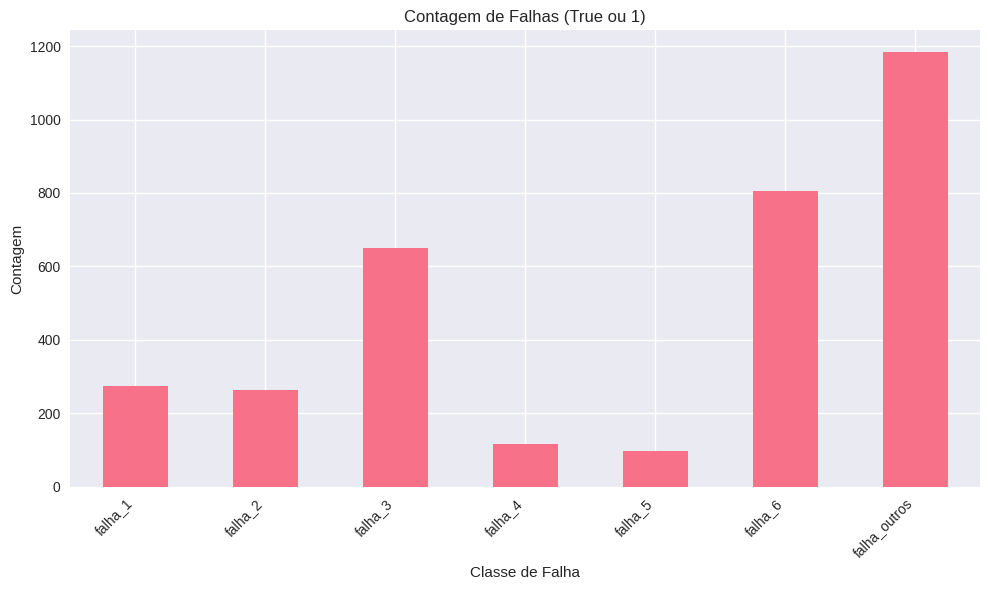

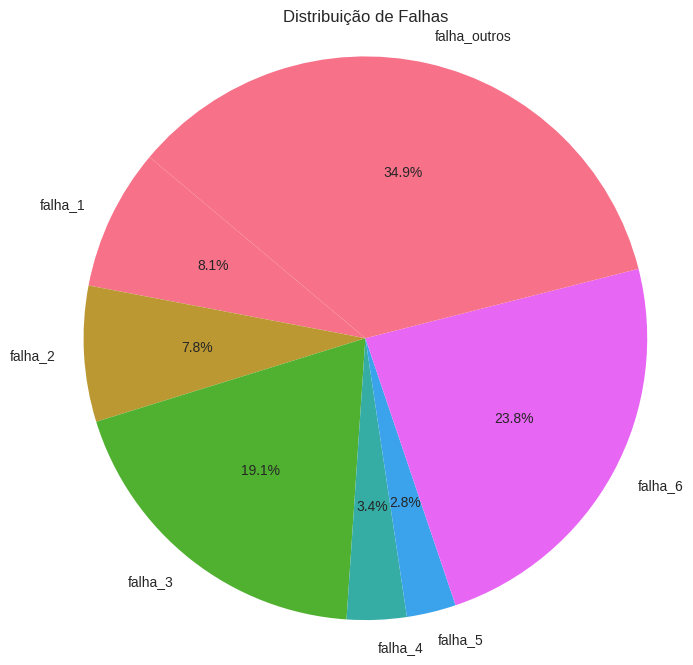

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
df = pd.read_csv('bootcamp_train_limpo.csv')

# Definir as classes de falha
classes_de_falha = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']

# Criar um DataFrame para armazenar as contagens de "True" ou "1" para cada classe
contagens_positivas = {}

for classe in classes_de_falha:
    # Contar ocorrências de "True" (ou True) e "1" (ou 1)
    contagem_true = df[classe].astype(str).str.lower().value_counts().get('true', 0) + df[classe].astype(str).str.lower().value_counts().get('1', 0)
    contagens_positivas[classe] = contagem_true

# Criar um DataFrame a partir do dicionário
df_contagens_positivas = pd.DataFrame(list(contagens_positivas.items()), columns=['Classe', 'Contagem'])
df_contagens_positivas = df_contagens_positivas.set_index('Classe')

# Exibir as contagens
print("Contagem de 'True' ou '1' por Classe:\n")
print(df_contagens_positivas)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
df_contagens_positivas['Contagem'].plot(kind='bar')
plt.title('Contagem de Falhas (True ou 1)')
plt.xlabel('Classe de Falha')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(df_contagens_positivas['Contagem'], labels=df_contagens_positivas.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Falhas')
plt.axis('equal')  # Assegura que o gráfico seja um círculo
plt.show()

Tratamento de dados nulos:
* **x_maximo, maximo_da_luminosidade, espessura_da_chapa_de_aço, indice_global_externo, indice_de_luminosidade**: Imputação simples pela média. Você poderia usar .median() se suspeitar de outliers (valores muito discrepantes).
* **index_quadrado**: Imputação pela moda (.mode()[0]) porque essa coluna provavelmente representa categorias. A moda é o valor mais frequente.

* **soma_da_luminosidade:** Se **area_pixels** existir, ele imputa os valores faltantes de **soma_da_luminosidade** usando **area_pixels** * 0.93 (com base na correlação). Essa é uma imputação mais informada, pois usa a relação entre as colunas.

* Se **area_pixels** não estiver presente, ele usa a média como um método de **fallback** (menos preciso).

In [1]:
import pandas as pd
import numpy as np

def tratar_nulos_com_correlacoes(df):
    """
    Trata valores nulos considerando correlações para imputação e criação de features.

    Args:
        df (pd.DataFrame): DataFrame com os dados.

    Returns:
        pd.DataFrame: DataFrame com os nulos tratados e novas features (se aplicável).
    """

    # 1. Cópia do DataFrame para não alterar o original
    df_tratado = df.copy()

    # 2. Imputação para 'x_maximo' (Estratégia Simples Inicial)
    #   -  Como não há correlações fortes listadas com 'x_maximo',
    #      usamos uma estratégia básica.
    df_tratado['x_maximo'] = df_tratado['x_maximo'].fillna(df_tratado['x_maximo'].mean())  # ou .median()

    # 3. Imputação para 'soma_da_luminosidade' (Alta Correlação com 'area_pixels')
    if 'area_pixels' in df_tratado.columns:  # Segurança: Verifica se a coluna existe
        df_tratado['soma_da_luminosidade'] = df_tratado['soma_da_luminosidade'].fillna(df_tratado['area_pixels'] * 0.93)
    else:
        df_tratado['soma_da_luminosidade'] = df_tratado['soma_da_luminosidade'].fillna(df_tratado['soma_da_luminosidade'].mean())

    # 4. Imputação para 'maximo_da_luminosidade' (Sem Correlação Forte Listada)
    df_tratado['maximo_da_luminosidade'] = df_tratado['maximo_da_luminosidade'].fillna(df_tratado['maximo_da_luminosidade'].mean())

    # 5. Imputação para 'espessura_da_chapa_de_aço' (Sem Correlação Forte Listada)
    df_tratado['espessura_da_chapa_de_aço'] = df_tratado['espessura_da_chapa_de_aço'].fillna(df_tratado['espessura_da_chapa_de_aço'].mean())

    # 6. Imputação para 'index_quadrado' (Sem Correlação Forte Listada)
    #   -  Aqui, a imputação pela moda é mais adequada se for categórica
    df_tratado['index_quadrado'] = df_tratado['index_quadrado'].fillna(df_tratado['index_quadrado'].mode()[0])

    # 7. Imputação para 'indice_global_externo' (Sem Correlação Forte Listada)
    df_tratado['indice_global_externo'] = df_tratado['indice_global_externo'].fillna(df_tratado['indice_global_externo'].mean())

    # 8. Imputação para 'indice_de_luminosidade' (Sem Correlação Forte Listada)
    df_tratado['indice_de_luminosidade'] = df_tratado['indice_de_luminosidade'].fillna(df_tratado['indice_de_luminosidade'].mean())

    # 9. Análise e Tratamento das Correlações Fortes (Tipo Aço)
    #   -  Como as correlações entre 'tipo_do_aço_a400', 'tipo_do_aço_a300' e 'tipo_do_aço' são perfeitas (1.00 ou -1.00),
    #      há redundância.  Removemos duas colunas.
    if 'tipo_do_aço_a300' in df_tratado.columns:
        df_tratado.drop(columns=['tipo_do_aço_a300'], inplace=True)
    if 'tipo_do_aço_a400' in df_tratado.columns:
        df_tratado.drop(columns=['tipo_do_aço_a400'], inplace=True)

    return df_tratado


# --- Programa Principal ---
if __name__ == "__main__":
    # 1. Carregar o arquivo CSV
    arquivo_csv = 'bootcamp_train_classe.csv'
    try:
        df = pd.read_csv(arquivo_csv)
    except FileNotFoundError:
        print(f"Erro: Arquivo '{arquivo_csv}' não encontrado.")
        exit()

    # 2. Tratar os nulos
    df_tratado = tratar_nulos_com_correlacoes(df)

    # 3. Criar o novo arquivo CSV
    arquivo_saida_csv = 'bootcamp_train_classe_nulos.csv'
    df_tratado.to_csv(arquivo_saida_csv, index=False)  # index=False evita salvar o índice do DataFrame

    print(f"Arquivo '{arquivo_saida_csv}' criado com sucesso.")

Arquivo 'bootcamp_train_classe_nulos.csv' criado com sucesso.


**Tratamento dados negativos:**

In [2]:
import pandas as pd
import numpy as np

def tratar_negativos(df):
    """
    Trata valores negativos em colunas específicas, considerando erros de medição e validade de índices.

    Args:
        df (pd.DataFrame): DataFrame com os dados.

    Returns:
        pd.DataFrame: DataFrame com os negativos tratados.
    """

    df_tratado = df.copy()

    # Colunas onde valores negativos (isolados) são considerados erros
    colunas_erro = ['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels',
                    'perimetro_x', 'perimetro_y', 'comprimento_do_transportador',
                    'espessura_da_chapa_de_aço']

    for coluna in colunas_erro:
        # Identifica valores únicos negativos
        valores_negativos_unicos = df_tratado[coluna][df_tratado[coluna] < 0].unique()
        if (len(valores_negativos_unicos) <= 1):  # Trata apenas se houver 0 ou 1 valor negativo único
            if (len(valores_negativos_unicos) == 1):
              valor_negativo = valores_negativos_unicos[0]
              # Imputa com a média dos valores positivos
              media_positiva = df_tratado[coluna][df_tratado[coluna] > 0].mean()
              df_tratado[coluna] = df_tratado[coluna].replace(valor_negativo, media_positiva)
        else:
            print(f"A coluna '{coluna}' possui mais de um valor negativo único. Requer tratamento específico.")

    # Colunas onde os negativos são válidos (índices) - Nenhuma ação necessária no momento, apenas imprimir
    colunas_indices = ['indice_de_variacao_x', 'indice_de_variacao_y', 'indice_de_orientaçao', 'indice_de_luminosidade']
    print("As seguintes colunas mantêm os valores negativos:")
    for coluna in colunas_indices:
        print(f"- {coluna}")

    return df_tratado


def tratar_nulos_e_negativos(df):
    """
    Trata valores nulos e negativos no DataFrame, considerando correlações e tipos de dados.

    Args:
        df (pd.DataFrame): DataFrame com os dados.

    Returns:
        pd.DataFrame: DataFrame tratado.
    """

    df_tratado = df.copy()

    # Tratar valores nulos (como no código anterior)
    df_tratado['x_maximo'] = df_tratado['x_maximo'].fillna(df_tratado['x_maximo'].mean())
    if 'area_pixels' in df_tratado.columns:
        df_tratado['soma_da_luminosidade'] = df_tratado['soma_da_luminosidade'].fillna(df_tratado['area_pixels'] * 0.93)
    else:
        df_tratado['soma_da_luminosidade'] = df_tratado['soma_da_luminosidade'].fillna(df_tratado['soma_da_luminosidade'].mean())
    df_tratado['maximo_da_luminosidade'] = df_tratado['maximo_da_luminosidade'].fillna(df_tratado['maximo_da_luminosidade'].mean())
    df_tratado['espessura_da_chapa_de_aço'] = df_tratado['espessura_da_chapa_de_aço'].fillna(df_tratado['espessura_da_chapa_de_aço'].mean())
    df_tratado['index_quadrado'] = df_tratado['index_quadrado'].fillna(df_tratado['index_quadrado'].mode()[0])
    df_tratado['indice_global_externo'] = df_tratado['indice_global_externo'].fillna(df_tratado['indice_global_externo'].mean())
    df_tratado['indice_de_luminosidade'] = df_tratado['indice_de_luminosidade'].fillna(df_tratado['indice_de_luminosidade'].mean())

    # Tratar valores negativos
    df_tratado = tratar_negativos(df_tratado)

    # Tratar correlações (Tipo Aço)
    if 'tipo_do_aço_a300' in df_tratado.columns:
        df_tratado.drop(columns=['tipo_do_aço_a300'], inplace=True)
    if 'tipo_do_aço_a400' in df_tratado.columns:
        df_tratado.drop(columns=['tipo_do_aço_a400'], inplace=True)


    return df_tratado


# --- Programa Principal ---
if __name__ == "__main__":
    arquivo_csv_entrada = 'bootcamp_train_classe_nulos.csv'
    arquivo_csv_saida = 'bootcamp_train_limpo.csv'

    try:
        df = pd.read_csv(arquivo_csv_entrada)
    except FileNotFoundError:
        print(f"Erro: Arquivo '{arquivo_csv_entrada}' não encontrado.")
        exit()

    df_limpo = tratar_nulos_e_negativos(df)
    df_limpo.to_csv(arquivo_csv_saida, index=False)

    print(f"Arquivo '{arquivo_csv_saida}' criado com sucesso.")

As seguintes colunas mantêm os valores negativos:
- indice_de_variacao_x
- indice_de_variacao_y
- indice_de_orientaçao
- indice_de_luminosidade
Arquivo 'bootcamp_train_limpo.csv' criado com sucesso.


Escolha do Modelo:

Verificação das classe de falha para a escolha do tipo de classificação multiclasse ou multi-rótulo.

In [ ]:
import pandas as pd

def verificar_exclusividade_falhas(caminho_arquivo):
    """
    Carrega um arquivo CSV e verifica se as colunas de falha (falha_1 a falha_6 e outras_falhas)
    são mutuamente exclusivas por amostra (linha).

    Args:
        caminho_arquivo (str): O caminho para o arquivo CSV.

    Returns:
        pandas.DataFrame: Um DataFrame contendo as amostras onde mais de uma coluna de falha tem valor 1.
                          Retorna um DataFrame vazio se todas as falhas forem exclusivas.
    """
    try:
        df = pd.read_csv(caminho_arquivo)
    except FileNotFoundError:
        return f"Erro: Arquivo não encontrado em '{caminho_arquivo}'"
    except Exception as e:
        return f"Erro ao carregar o arquivo: {e}"

    colunas_falhas = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'outras_falhas']

    # Verifica se todas as colunas de falha existem no DataFrame
    colunas_existentes = [col for col in colunas_falhas if col in df.columns]
    if not colunas_existentes:
        return "Aviso: Nenhuma das colunas de falha esperadas foi encontrada no arquivo."

    # Soma os valores das colunas de falha para cada amostra (linha)
    df['soma_falhas'] = df[colunas_existentes].sum(axis=1)

    # Identifica as amostras onde a soma das falhas é maior que 1
    conflitos = df[df['soma_falhas'] > 1]

    # Remove a coluna de soma auxiliar
    df.drop(columns=['soma_falhas'], inplace=True)

    if not conflitos.empty:
        print("Aviso: As seguintes amostras apresentam mais de um tipo de falha sinalizado (não são exclusivas):")
        return conflitos
    else:
        print("Verificação concluída: As falhas (falha_1 a falha_6 e outras_falhas) parecem ser exclusivas por amostra.")
        return pd.DataFrame()

# Exemplo de uso:
caminho_do_arquivo = 'bootcamp_train_classe.csv'  # Substitua pelo caminho real do seu arquivo
conflitos_encontrados = verificar_exclusividade_falhas(caminho_do_arquivo)

if not isinstance(conflitos_encontrados, str) and not conflitos_encontrados.empty:
    print(conflitos_encontrados)
elif isinstance(conflitos_encontrados, str):
    print(conflitos_encontrados)

Verificação concluída: As falhas (falha_1 a falha_6 e outras_falhas) parecem ser exclusivas por amostra.


Classificação Multiclasse:

* Cada amostra pertence apenas uma categoria de falha.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:55:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Classification Report:
              precision    recall  f1-score   support

     falha_1       0.50      0.29      0.37        55
     falha_2       0.94      0.85      0.89        53
     falha_3       0.98      0.95      0.96       130
     falha_4       0.83      0.87      0.85        23
     falha_5       0.65      0.68      0.67        19
     falha_6       0.58      0.55      0.56       161
falha_outros       0.62      0.72      0.67       237

    accuracy                           0.70       678
   macro avg       0.73      0.70      0.71       678
weighted avg       0.70      0.70      0.70       678



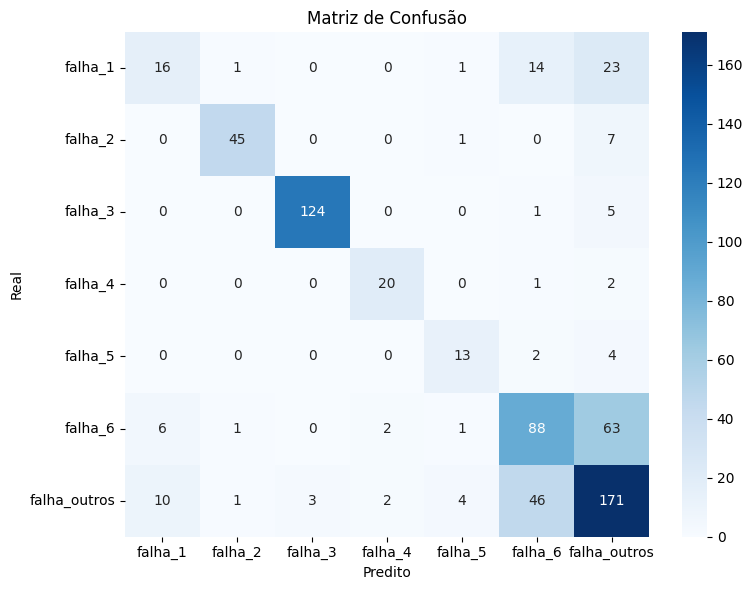

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar o dataset
df = pd.read_csv("bootcamp_train_limpo.csv")


# 2. Combinar colunas de falha em uma única variável categórica
falha_cols = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']
df['tipo_de_falha'] = df[falha_cols].idxmax(axis=1)

# (Opcional) Remover as colunas originais de falha
df.drop(columns=falha_cols, inplace=True)

# 3. Separar features e target
X = df.drop(columns=['tipo_de_falha'])
y = df['tipo_de_falha']

# ⚠️ 4. Codificar colunas categóricas (ex: tipo_de_aço)
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
if cat_cols:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 5. Codificar a variável target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 6. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

# 7. Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Treinar o modelo
model = XGBClassifier(
    objective="multi:softprob",
    num_class=len(np.unique(y_encoded)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# 9. Avaliar o modelo
y_pred = model.predict(X_test_scaled)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 10. Matriz de confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.tight_layout()
plt.show()



Treino do modelo com smoth:


🔍 Distribuição das classes ANTES do SMOTE:
6    947
5    645
2    519
0    220
1    211
3     93
4     77
Name: count, dtype: int64

🔍 Distribuição das classes APÓS SMOTE:
3    947
6    947
4    947
2    947
5    947
1    947
0    947
Name: count, dtype: int64

📊 Classification Report (com SMOTE):
              precision    recall  f1-score   support

     falha_1       0.47      0.56      0.51        55
     falha_2       0.86      0.91      0.88        53
     falha_3       0.95      0.95      0.95       130
     falha_4       0.81      0.91      0.86        23
     falha_5       0.56      0.74      0.64        19
     falha_6       0.59      0.61      0.60       161
falha_outros       0.71      0.62      0.66       237

    accuracy                           0.71       678
   macro avg       0.71      0.76      0.73       678
weighted avg       0.72      0.71      0.71       678



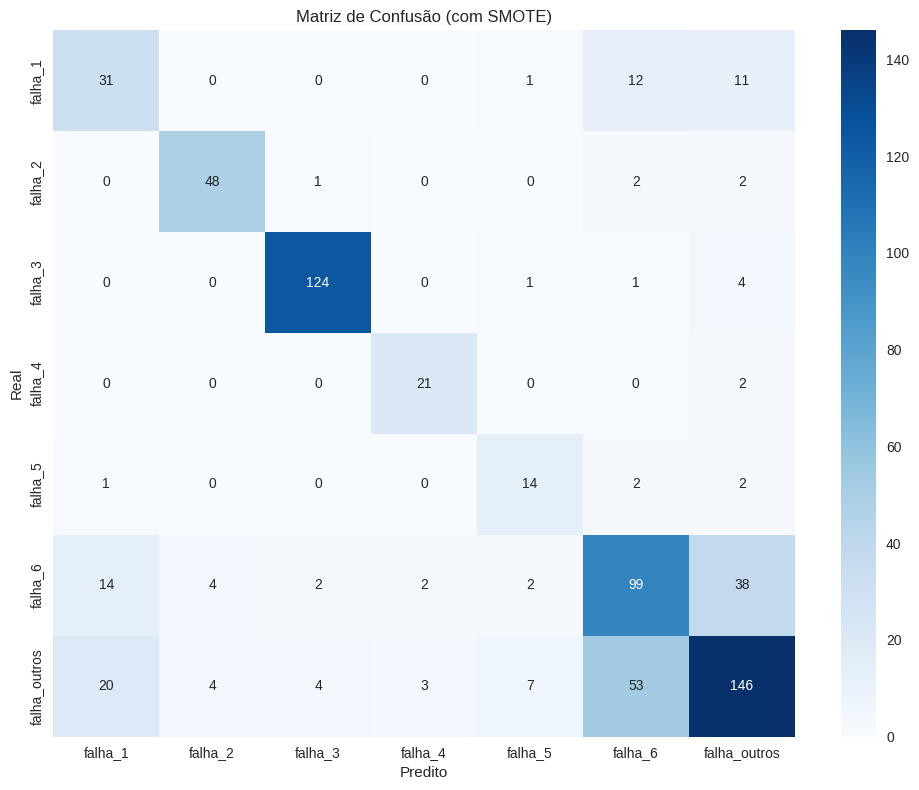

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Carregar o dataset
df = pd.read_csv("bootcamp_train_limpo.csv")

# 2. Combinar colunas de falha em uma única variável categórica
falha_cols = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']
df['tipo_de_falha'] = df[falha_cols].idxmax(axis=1)
df.drop(columns=falha_cols, inplace=True)

# 3. Separar features e target
X = df.drop(columns=['tipo_de_falha'])
y = df['tipo_de_falha']

# 4. Codificar colunas categóricas
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
if cat_cols:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 5. Codificar a variável target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 6. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    stratify=y_encoded,
    test_size=0.2,
    random_state=42
)

# 7. Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Análise do desbalanceamento antes do SMOTE
print("\n🔍 Distribuição das classes ANTES do SMOTE:")
class_counts = pd.Series(y_train).value_counts()
print(class_counts)

# 9. Aplicar SMOTE com estratégia correta
# Opção 1: Usar 'auto' para balancear todas as classes minoritárias
smote = SMOTE(
    sampling_strategy='auto',  # Balanceia todas as classes minoritárias para a maioria
    random_state=42,
    k_neighbors=3
)

# Opção 2: Especificar um multiplicador para aumentar classes específicas
# smote = SMOTE(
#     sampling_strategy={0: 'multiply', 4: 'multiply'},  # Multiplica falha_1 e falha_5
#     random_state=42,
#     k_neighbors=3
# )

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# 10. Verificar distribuição após SMOTE
print("\n🔍 Distribuição das classes APÓS SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# 11. Treinar o modelo XGBoost (sem use_label_encoder)
model = XGBClassifier(
    objective="multi:softprob",
    num_class=len(np.unique(y_encoded)),
    eval_metric='mlogloss',
    random_state=42,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)

model.fit(X_train_resampled, y_train_resampled)

# 12. Avaliar o modelo
y_pred = model.predict(X_test_scaled)

print("\n📊 Classification Report (com SMOTE):")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 13. Matriz de confusão
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='Blues')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão (com SMOTE)")
plt.tight_layout()
plt.show()

Análise Detalhada do Classification Report:

  Desempenho por Classe:

   * **falha_1**: Apresenta um desempenho bem baixo, com precisão de 42% e recall de apenas 25%. Isso significa que o modelo erra muitas vezes ao prever 'falha_1' e também não consegue identificar corretamente a maioria das ocorrências reais dessa falha. O F1-score de 0.32 é um reflexo disso. O support de 55 indica que há uma quantidade razoável de amostras dessa classe para avaliação.

   * **falha_2 e falha_3**: Demonstram um desempenho excelente, com F1-scores de 0.92 e 0.96, respectivamente. A precisão e o recall são altos para ambas, indicando que o modelo é muito bom em identificar e prever corretamente essas falhas. O support de 53 para 'falha_2' e 130 para 'falha_3' é significativo.

   * **falha_4**: Tem um bom desempenho, com um F1-score de 0.87. A precisão e o recall estão bem equilibrados em 87%. O support de 23 é menor em comparação com outras classes.

   * **falha_5**: Mostra um desempenho moderado, com um F1-score de 0.59. A precisão (67%) é melhor que o recall (53%), sugerindo que quando o modelo prevê 'falha_5', geralmente está correto, mas perde uma parte significativa das ocorrências reais. O baixo support de 19 pode tornar essas métricas menos estáveis.

   * **falha_6**: Apresenta um desempenho razoável, com um F1-score de 0.58. A precisão e o recall estão iguais em 58%. O support relativamente alto de 161 torna essa avaliação mais confiável.

   * **falha_outros**: Tem um desempenho intermediário, com um F1-score de 0.68. O recall (73%) é um pouco maior que a precisão (63%), indicando que o modelo identifica uma boa parte das ocorrências reais, mas também inclui algumas amostras de outras classes nessa previsão. O alto support de 237 fornece uma avaliação robusta.

    **Métricas Gerais:**

        * Acurácia (Accuracy): 0.71. Indica que o modelo classificou corretamente 71% de todas as amostras no conjunto de teste. Embora seja uma métrica geral, em um cenário com classes desbalanceadas (como parece ser aqui, com 'falha_outros' e 'falha_6' tendo maior representatividade), a acurácia pode ser enganosa.

        * Média Macro (Macro Avg): As médias macro para precisão (0.73), recall (0.68) e F1-score (0.70) fornecem uma visão do desempenho médio do modelo em todas as classes, sem levar em conta o número de amostras em cada uma. A diferença entre a média macro do F1-score (0.70) e a acurácia (0.71) não é muito grande, mas as variações significativas no desempenho por classe são importantes.
        * Média Ponderada (Weighted Avg): As médias ponderadas para precisão (0.70), recall (0.71) e F1-score (0.70) levam em consideração o número de amostras em cada classe. O F1-score ponderado de 0.70 é ligeiramente menor que a acurácia, o que pode sugerir que o modelo tem um desempenho melhor nas classes mais frequentes.

Implicações e Próximos Passos:

  * Desbalanceamento de Classes: O desempenho variável entre as classes provavelmente está relacionado ao desbalanceamento no número de amostras por classe (support). Classes com maior support ('falha_3', 'falha_6', 'falha_outros') geralmente têm um desempenho razoável, enquanto classes minoritárias ('falha_1', 'falha_5') apresentam um desempenho inferior.

  * Foco na Melhoria das Classes com Baixo Desempenho: É crucial investigar as razões para o baixo desempenho em 'falha_1' e 'falha_5'. Isso pode envolver:
     * Análise de Dados: Entender as características dessas falhas e como elas se distinguem das outras.
     * Balanceamento de Dados: Aplicar técnicas de oversampling das classes minoritárias ou undersampling das classes majoritárias no conjunto de treinamento.
     * Engenharia de Features: Criar novas features que possam melhorar a separabilidade dessas classes.
      * Ajuste de Hiperparâmetros: Otimizar os hiperparâmetros do modelo, possivelmente com foco em métricas que lidam melhor com desbalanceamento (como F1-score ponderado).
      * Experimentação com Outros Modelos: Considerar algoritmos que são mais robustos a dados desbalanceados ou que podem aprender melhor as características das classes minoritárias.

  * Bom Desempenho em Algumas Classes: O modelo está funcionando bem para 'falha_2', 'falha_3' e 'falha_4', o que é positivo. No entanto, a performance geral pode ser melhorada focando nas classes com dificuldades.
  Métricas de Avaliação: Em um cenário desbalanceado, o F1-score ponderado e a análise das métricas por classe fornecem uma avaliação mais informativa do que a acurácia isoladamente.

Em resumo, este Classification Report fornece um diagnóstico claro do desempenho do seu modelo de classificação multiclasse. Os próximos passos devem se concentrar em lidar com o desbalanceamento de classes e melhorar o desempenho nas classes com métricas mais baixas para construir um modelo mais robusto e equilibrado.

Modelo com SMOTE:


🔍 Distribuição das classes ANTES do SMOTE:
6    947
5    645
2    519
0    220
1    211
3     93
4     77
Name: count, dtype: int64

🔍 Distribuição das classes APÓS SMOTE:
3    947
6    947
4    947
2    947
5    947
1    947
0    947
Name: count, dtype: int64

📊 Classification Report (com SMOTE):
              precision    recall  f1-score   support

     falha_1       0.47      0.56      0.51        55
     falha_2       0.86      0.91      0.88        53
     falha_3       0.95      0.95      0.95       130
     falha_4       0.81      0.91      0.86        23
     falha_5       0.56      0.74      0.64        19
     falha_6       0.59      0.61      0.60       161
falha_outros       0.71      0.62      0.66       237

    accuracy                           0.71       678
   macro avg       0.71      0.76      0.73       678
weighted avg       0.72      0.71      0.71       678



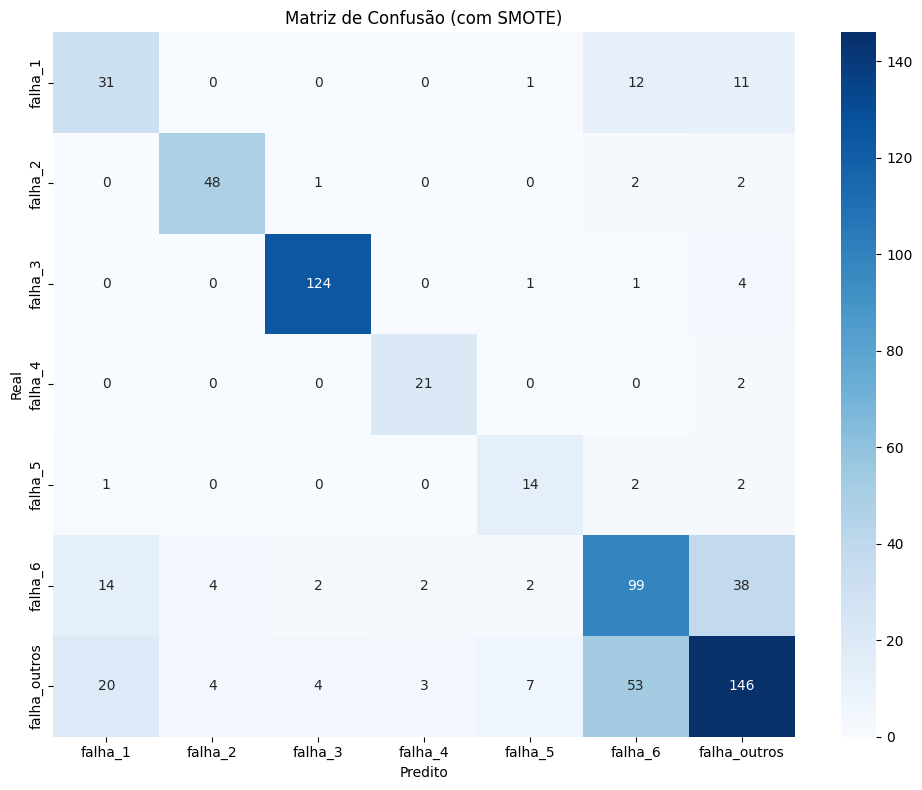


💾 Colunas de treino salvas como: colunas_treino.pkl

💾 Modelo treinado salvo como: modelo_falhas.pkl
💾 Scaler salvo como: scaler_falhas.pkl
💾 Label Encoder salvo como: label_encoder_falhas.pkl


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
import joblib  # Para salvar o modelo

# 1. Carregar o dataset
df = pd.read_csv("bootcamp_train_limpo.csv")

# 2. Combinar colunas de falha em uma única variável categórica
falha_cols = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']
df['tipo_de_falha'] = df[falha_cols].idxmax(axis=1)
df.drop(columns=falha_cols, inplace=True)

# 3. Separar features e target
X = df.drop(columns=['tipo_de_falha'])
y = df['tipo_de_falha']

# 4. Codificar colunas categóricas
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
if cat_cols:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 5. Codificar a variável target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 6. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    stratify=y_encoded,
    test_size=0.2,
    random_state=42
)

# 7. Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Análise do desbalanceamento antes do SMOTE
print("\n🔍 Distribuição das classes ANTES do SMOTE:")
class_counts = pd.Series(y_train).value_counts()
print(class_counts)

# 9. Aplicar SMOTE com estratégia correta
smote = SMOTE(
    sampling_strategy='auto',  # Balanceia todas as classes minoritárias para a maioria
    random_state=42,
    k_neighbors=3
)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# 10. Verificar distribuição após SMOTE
print("\n🔍 Distribuição das classes APÓS SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# 11. Treinar o modelo XGBoost (sem use_label_encoder)
model = XGBClassifier(
    objective="multi:softprob",
    num_class=len(np.unique(y_encoded)),
    eval_metric='mlogloss',
    random_state=42,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)

model.fit(X_train_resampled, y_train_resampled)

# 12. Avaliar o modelo
y_pred = model.predict(X_test_scaled)

print("\n📊 Classification Report (com SMOTE):")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 13. Matriz de confusão
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='Blues')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão (com SMOTE)")
plt.tight_layout()
plt.show()

# 14. Salvar o modelo treinado, o scaler e o label encoder
import joblib

modelo_filename = 'modelo_falhas.pkl'
scaler_filename = 'scaler_falhas.pkl'
label_encoder_filename = 'label_encoder_falhas.pkl'
colunas_treino_filename = 'colunas_treino.pkl'

joblib.dump(X.columns.tolist(), colunas_treino_filename)
joblib.dump(model, modelo_filename)
joblib.dump(scaler, scaler_filename)
joblib.dump(le, label_encoder_filename)

print(f"\n💾 Colunas de treino salvas como: {colunas_treino_filename}")
print(f"\n💾 Modelo treinado salvo como: {modelo_filename}")
print(f"💾 Scaler salvo como: {scaler_filename}")
print(f"💾 Label Encoder salvo como: {label_encoder_filename}")

Teste na API

In [11]:
import pandas as pd
import joblib

# Carregar o modelo treinado, o scaler e o label encoder
modelo = joblib.load('modelo_falhas.pkl')
scaler = joblib.load('scaler_falhas.pkl')
le = joblib.load('label_encoder_falhas.pkl')
colunas_treino = joblib.load('colunas_treino.pkl')

# Carregar o arquivo de teste (SEM a coluna 'tipo_de_falha')
arquivo_entrada = "bootcamp_test.csv"  # Substitua pelo nome correto do seu arquivo de entrada
df_predict = pd.read_csv(arquivo_entrada)

# Garantir que a coluna 'id' esteja presente
if 'id' not in df_predict.columns:
    raise ValueError("O arquivo de entrada não possui a coluna 'id'.")

df_output = df_predict[['id']].copy()  # Criar DataFrame de saída com a coluna 'id'

# Pré-processar os dados para predição
X_predict = df_predict.drop(columns=['id'], errors='ignore')
X_predict = X_predict.reindex(columns=colunas_treino, fill_value=0)
X_scaled_predict = scaler.transform(X_predict)

# Fazer as previsões
y_pred_encoded = modelo.predict(X_scaled_predict)
y_pred_labels = le.inverse_transform(y_pred_encoded)

# Criar as colunas binárias de falha no DataFrame de saída
df_output['falha_1'] = (y_pred_labels == 'falha_1').astype(int)
df_output['falha_2'] = (y_pred_labels == 'falha_2').astype(int)
df_output['falha_3'] = (y_pred_labels == 'falha_3').astype(int)
df_output['falha_4'] = (y_pred_labels == 'falha_4').astype(int)
df_output['falha_5'] = (y_pred_labels == 'falha_5').astype(int)
df_output['falha_6'] = (y_pred_labels == 'falha_6').astype(int)
df_output['falha_outros'] = (y_pred_labels == 'falha_outros').astype(int)

# Salvar o DataFrame de saída em um arquivo CSV
arquivo_saida = 'previsoes_api.csv'
df_output.to_csv(arquivo_saida, index=False)

print(f"\n💾 Arquivo de saída para a API salvo como: {arquivo_saida}")
print("\nPrimeiras linhas do arquivo de saída:")
print(df_output.head())


💾 Arquivo de saída para a API salvo como: previsoes_api.csv

Primeiras linhas do arquivo de saída:
     id  falha_1  falha_2  falha_3  falha_4  falha_5  falha_6  falha_outros
0  3390        0        0        0        0        0        0             1
1  3391        0        0        0        0        0        0             1
2  3392        0        0        0        0        0        0             1
3  3393        0        0        0        0        0        1             0
4  3394        0        0        0        0        0        0             1
